In [1]:
%pylab inline
import pandas as pd
import seaborn as sb

Populating the interactive namespace from numpy and matplotlib


In [2]:

data = pd.read_csv('uber-raw-data-apr14.csv')

In [3]:
data

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512
...,...,...,...,...
564511,4/30/2014 23:22:00,40.7640,-73.9744,B02764
564512,4/30/2014 23:26:00,40.7629,-73.9672,B02764
564513,4/30/2014 23:31:00,40.7443,-73.9889,B02764
564514,4/30/2014 23:32:00,40.6756,-73.9405,B02764


In [4]:
data.shape

(564516, 4)

In [5]:

data['Date/Time'] = pd.to_datetime(data['Date/Time'])

In [6]:
data['Date/Time'][0].day_name()

'Tuesday'

In [7]:
data['Date/Time'].dt.day_name()

0           Tuesday
1           Tuesday
2           Tuesday
3           Tuesday
4           Tuesday
            ...    
564511    Wednesday
564512    Wednesday
564513    Wednesday
564514    Wednesday
564515    Wednesday
Name: Date/Time, Length: 564516, dtype: object

In [8]:
data['Daysofweek'] = data['Date/Time'].dt.day_name()

In [9]:
data

,Date/Time,Lat,Lon,Base,Daysofweek
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,Tuesday
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,Tuesday
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,Tuesday
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,Tuesday
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,Tuesday
...,...,...,...,...,...
564511,2014-04-30 23:22:00,40.7640,-73.9744,B02764,Wednesday
564512,2014-04-30 23:26:00,40.7629,-73.9672,B02764,Wednesday
564513,2014-04-30 23:31:00,40.7443,-73.9889,B02764,Wednesday
564514,2014-04-30 23:32:00,40.6756,-73.9405,B02764,Wednesday


In [10]:
data['Date/Time'][0].week

14

In [11]:
data['Date/Time']

0        2014-04-01 00:11:00
1        2014-04-01 00:17:00
2        2014-04-01 00:21:00
3        2014-04-01 00:28:00
4        2014-04-01 00:33:00
                 ...        
564511   2014-04-30 23:22:00
564512   2014-04-30 23:26:00
564513   2014-04-30 23:31:00
564514   2014-04-30 23:32:00
564515   2014-04-30 23:48:00
Name: Date/Time, Length: 564516, dtype: datetime64[ns]

In [12]:
data.tail()

,Date/Time,Lat,Lon,Base,Daysofweek
564511,2014-04-30 23:22:00,40.7640,-73.9744,B02764,Wednesday
564512,2014-04-30 23:26:00,40.7629,-73.9672,B02764,Wednesday
564513,2014-04-30 23:31:00,40.7443,-73.9889,B02764,Wednesday
564514,2014-04-30 23:32:00,40.6756,-73.9405,B02764,Wednesday
564515,2014-04-30 23:48:00,40.6880,-73.9608,B02764,Wednesday


In [29]:
def get_day(dt):
    return dt.day

data["DoM"] = data['Date/Time'].map(get_day)

In [50]:
def get_hour(dt):
    return dt.hour

data['Hour'] = data['Date/Time'].map(get_hour)

def get_week(dt):
    return dt.weekday()

data['Weekday'] = data['Date/Time'].map(get_week)

In [51]:
data

,Date/Time,Lat,Lon,Base,Daysofweek,DoM,Hour,Week,Weekday
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,Tuesday,1,0,14,1
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,Tuesday,1,0,14,1
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,Tuesday,1,0,14,1
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,Tuesday,1,0,14,1
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,Tuesday,1,0,14,1
...,...,...,...,...,...,...,...,...,...
564511,2014-04-30 23:22:00,40.7640,-73.9744,B02764,Wednesday,30,23,18,2
564512,2014-04-30 23:26:00,40.7629,-73.9672,B02764,Wednesday,30,23,18,2
564513,2014-04-30 23:31:00,40.7443,-73.9889,B02764,Wednesday,30,23,18,2
564514,2014-04-30 23:32:00,40.6756,-73.9405,B02764,Wednesday,30,23,18,2


Text(0.5, 1.0, 'Frequency of Uber - Apr - 2014')

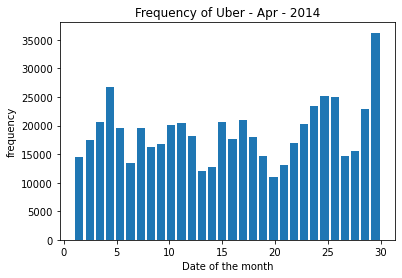

In [21]:
hist(data.DoM , bins = 30 , rwidth = 0.8)
xlabel('Date of the month')
ylabel('frequency')
title('Frequency of Uber - Apr - 2014')

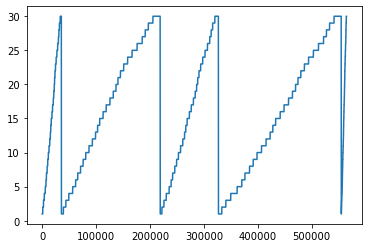

In [18]:
plot(data.DoM)

In [24]:
for k , row in data.groupby('DoM'):
    print ((k,len(row)))

(1, 14546)
(2, 17474)
(3, 20701)
(4, 26714)
(5, 19521)
(6, 13445)
(7, 19550)
(8, 16188)
(9, 16843)
(10, 20041)
(11, 20420)
(12, 18170)
(13, 12112)
(14, 12674)
(15, 20641)
(16, 17717)
(17, 20973)
(18, 18074)
(19, 14602)
(20, 11017)
(21, 13162)
(22, 16975)
(23, 20346)
(24, 23352)
(25, 25095)
(26, 24925)
(27, 14677)
(28, 15475)
(29, 22835)
(30, 36251)


In [25]:
def count(row):
    return(len(row))

by_date  = data.groupby('DoM').apply(count)
by_date

DoM
1     14546
2     17474
3     20701
4     26714
5     19521
6     13445
7     19550
8     16188
9     16843
10    20041
11    20420
12    18170
13    12112
14    12674
15    20641
16    17717
17    20973
18    18074
19    14602
20    11017
21    13162
22    16975
23    20346
24    23352
25    25095
26    24925
27    14677
28    15475
29    22835
30    36251
dtype: int64

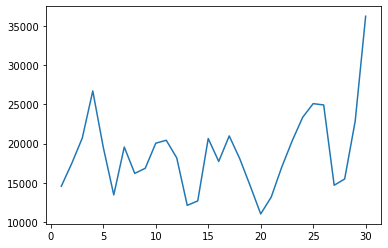

In [26]:
plot(by_date)

In [40]:
 data.groupby('Hour Week'.split()).apply(count)

Hour  Week
0     14      3030
      15      2665
      16      2316
      17      3343
      18       556
              ... 
23    14      4753
      15      4273
      16      4195
      17      5772
      18      1656
Length: 120, dtype: int64

In [53]:
by_cross = data.groupby('Hour Weekday'.split()).apply(count).unstack()
by_cross

Weekday,0,1,2,3,4,5,6
Hour,,,,,,,
0,518,765,899,792,1367,3027,4542
1,261,367,507,459,760,2479,2936
2,238,304,371,342,513,1577,1590
3,571,516,585,567,736,1013,1052
4,1021,887,1003,861,932,706,685
5,1619,1734,1990,1454,1382,704,593
6,2974,3766,4230,3179,2836,844,669
7,3888,5304,5647,4159,3943,1110,873
8,3138,4594,5242,3616,3648,1372,1233


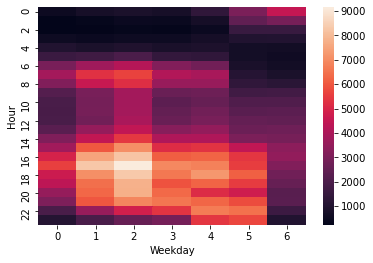

In [55]:
import seaborn
seaborn.heatmap(by_cross)


In [57]:
season = pd.read_csv('season-1819_csv.csv')
season

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA
0,SP1,17/08/2018,Betis,Levante,0,3,A,0,1,A,...,2.06,20,-0.75,1.89,1.85,2.07,2.00,1.59,4.42,5.89
1,SP1,17/08/2018,Girona,Valladolid,0,0,D,0,0,D,...,1.71,20,-0.75,2.06,2.01,1.90,1.85,1.76,3.57,5.62
2,SP1,18/08/2018,Barcelona,Alaves,3,0,H,0,0,D,...,3.18,19,-2.50,1.95,1.91,2.00,1.95,1.10,11.85,32.17
3,SP1,18/08/2018,Celta,Espanol,1,1,D,0,1,A,...,1.76,18,-0.75,2.26,2.18,1.74,1.71,2.18,3.26,3.85
4,SP1,18/08/2018,Villarreal,Sociedad,1,2,A,1,1,D,...,1.81,18,-0.25,1.76,1.74,2.23,2.14,2.32,3.21,3.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,SP1,18/05/2019,Levante,Ath Madrid,2,2,D,2,0,H,...,2.23,18,0.50,1.91,1.87,2.04,1.99,4.34,4.10,1.81
376,SP1,18/05/2019,Sevilla,Ath Bilbao,2,0,H,1,0,H,...,2.08,19,-1.00,2.70,2.60,1.60,1.53,2.17,3.08,4.15
377,SP1,18/05/2019,Valladolid,Valencia,0,2,A,0,1,A,...,2.25,20,1.50,1.78,1.74,2.20,2.13,8.01,5.13,1.40
378,SP1,19/05/2019,Eibar,Barcelona,2,2,D,2,2,D,...,2.65,19,0.50,2.03,1.98,1.92,1.88,4.96,4.55,1.65


In [61]:
season.columns

Index(['Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG',
       'HTAG', 'HTR', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY',
       'AY', 'HR', 'AR', 'B365H', 'B365D', 'B365A', 'BWH', 'BWD', 'BWA', 'IWH',
       'IWD', 'IWA', 'PSH', 'PSD', 'PSA', 'WHH', 'WHD', 'WHA', 'VCH', 'VCD',
       'VCA', 'Bb1X2', 'BbMxH', 'BbAvH', 'BbMxD', 'BbAvD', 'BbMxA', 'BbAvA',
       'BbOU', 'BbMx>2.5', 'BbAv>2.5', 'BbMx<2.5', 'BbAv<2.5', 'BbAH', 'BbAHh',
       'BbMxAHH', 'BbAvAHH', 'BbMxAHA', 'BbAvAHA', 'PSCH', 'PSCD', 'PSCA'],
      dtype='object')